In [3]:
import pandas as pd 
data = pd.read_csv(r'./csv/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# 检查一下每一列的数据类型
for i in data.columns:
    print(data[i].dtype)

int64
int64
int64
int64
int64
int64
int64
int64
int64
float64
int64
int64
int64
int64


In [5]:
# 找到所有连续的特征 哈哈发现全都是连续变量
continues_features = []
for i in data.columns:
    if data[i].dtype != 'object':
        continues_features.append(i)
continues_features

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [7]:
# 将连续特征用中位数来填坑，也就是缺失值
for feature in continues_features:
    median = data[feature].median()
    data[feature].fillna(median,inplace = True)

In [8]:
# 数据可视化
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
# 中文字体设置
plt.rcParams['font.sans-serif'] = ['SimHei']
# 解决负号显示问题
plt.rcParams['axes.unicode_minus'] = False
# 图片大小
plt.figure(figsize = (12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

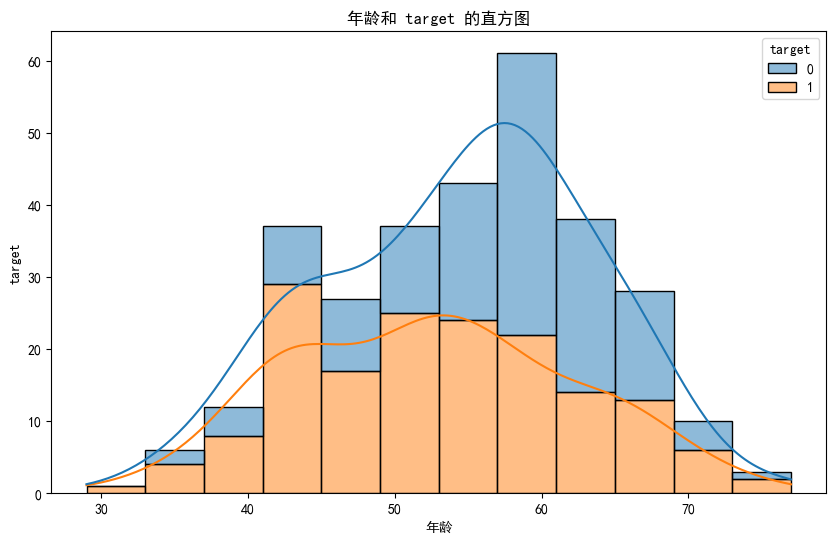

In [25]:
#直方图 可以看到每个年龄对应的 trestbps 的分布情况
plt.figure(figsize = (10,6))
sns.histplot(x='age',hue='target',multiple = 'stack',kde=True,data=data)
plt.title('年龄和 target 的直方图')  # 使用中文标题
plt.xlabel('年龄')
plt.ylabel('target')
plt.show()


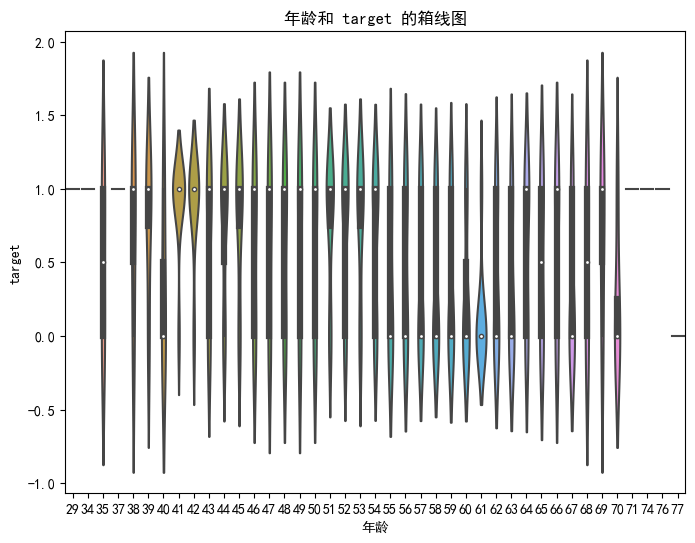

In [26]:
# 小提琴图，age是连续变量，但是我也可以把他当做离散变量来画下图，看下哪个效果更好，target是离散变量
plt.figure(figsize=(8,6))
sns.violinplot(x='age',y='target',data=data)
plt.title('年龄和 target 的箱线图')  # 使用中文标题
plt.xlabel('年龄')
plt.ylabel('target')
plt.show()

其余连续变量同理了，都可以用上面的方法来画出直方图。
这个年龄数据离散变量，所以画箱线图，其余也同理。
可以主观判断一下这个是否是连续变量还是离散变量。
